1. Data Understanding and Exploration

In [1]:
# Importing required libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import imblearn
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading DataFrame 1 and assigning it to a variable
df1 = pd.read_csv("C:/Users/ruhee/OneDrive/Desktop/AIML/TelcomCustomer-Churn_1.csv")

In [3]:
# Reading DataFrame 2 and assigning it to a variable
df2 = pd.read_csv("C:/Users/ruhee/OneDrive/Desktop/AIML/TelcomCustomer-Churn_2.csv")

In [4]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [5]:
df1.shape

(7043, 10)

In [6]:
df2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df2.shape

(7043, 12)

In [8]:
# Merging both the DataFrames on key ‘customerID’ to form a single DataFrame
df = pd.merge(df1, df2, on = 'customerID')

In [9]:
df.shape

(7043, 21)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
# Verifying if all the columns are incorporated in the merged DataFrame
print(df1.shape)
print(df2.shape)
print(df.shape)
merged_cols = df.columns
df1_cols = df1.columns
df2_cols = df2.columns
print(df1_cols.isin(merged_cols))
print(df2_cols.isin(merged_cols))

(7043, 10)
(7043, 12)
(7043, 21)
[ True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True]


All columns are incorporated in the merged dataframe.

2. Data Cleaning and Analysis

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
# Converting 'TotalCharges' to numeric datatype
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [15]:
# Converting 'tenure' to 'float64'
df['tenure'] = df['tenure'].astype(float)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


'MonthlyCharges', 'TotalCharges' and 'tenure' are variables with continuous values and are of ‘Float’ type.

In [17]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:
# There are 11 missing values in the dataset
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0.0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0.0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0.0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0.0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [19]:
# Dropping rows with null values
df.dropna(inplace = True)

In [20]:
# Dropping 'customerID' column since it does not provide any important information and is unique for each customer
df.drop(columns = 'customerID', inplace = True)

In [21]:
print(df.gender.value_counts())
print(df.SeniorCitizen.value_counts())
print(df.Partner.value_counts())
print(df.Dependents.value_counts())
print(df.tenure.value_counts())
print(df.PhoneService.value_counts())
print(df.MultipleLines.value_counts())
print(df.InternetService.value_counts())
print(df.OnlineSecurity.value_counts())
print(df.OnlineBackup.value_counts())
print(df.DeviceProtection.value_counts())
print(df.TechSupport.value_counts())
print(df.StreamingTV.value_counts())
print(df.StreamingMovies.value_counts())
print(df.Contract.value_counts())
print(df.PaperlessBilling.value_counts())
print(df.PaymentMethod.value_counts())
print(df.MonthlyCharges.value_counts())
print(df.TotalCharges.value_counts())
print(df.Churn.value_counts())

Male      3549
Female    3483
Name: gender, dtype: int64
0    5890
1    1142
Name: SeniorCitizen, dtype: int64
No     3639
Yes    3393
Name: Partner, dtype: int64
No     4933
Yes    2099
Name: Dependents, dtype: int64
1.0     613
72.0    362
2.0     238
3.0     200
4.0     176
       ... 
38.0     59
28.0     57
39.0     56
44.0     51
36.0     50
Name: tenure, Length: 72, dtype: int64
Yes    6352
No      680
Name: PhoneService, dtype: int64
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype

In [22]:
unique_values = df.apply(lambda x: x.unique())
unique_values

gender                                                 [Female, Male]
SeniorCitizen                                                  [0, 1]
Partner                                                     [Yes, No]
Dependents                                                  [No, Yes]
tenure              [1.0, 34.0, 2.0, 45.0, 8.0, 22.0, 10.0, 28.0, ...
PhoneService                                                [No, Yes]
MultipleLines                             [No phone service, No, Yes]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity                         [No, Yes, No internet service]
OnlineBackup                           [Yes, No, No internet service]
DeviceProtection                       [No, Yes, No internet service]
TechSupport                            [No, Yes, No internet service]
StreamingTV                            [No, Yes, No internet service]
StreamingMovies                        [No, Yes, No internet service]
Contract            

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   float64
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [24]:
# SeniorCitizen is also a categorical variable, therefore, conveeting 0 to No and 1 to Yes
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

In [25]:
# Converting 'object' to 'category'
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] = df[object_columns].astype('category')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   category
 1   SeniorCitizen     7032 non-null   category
 2   Partner           7032 non-null   category
 3   Dependents        7032 non-null   category
 4   tenure            7032 non-null   float64 
 5   PhoneService      7032 non-null   category
 6   MultipleLines     7032 non-null   category
 7   InternetService   7032 non-null   category
 8   OnlineSecurity    7032 non-null   category
 9   OnlineBackup      7032 non-null   category
 10  DeviceProtection  7032 non-null   category
 11  TechSupport       7032 non-null   category
 12  StreamingTV       7032 non-null   category
 13  StreamingMovies   7032 non-null   category
 14  Contract          7032 non-null   category
 15  PaperlessBilling  7032 non-null   category
 16  PaymentMethod     7032 n

Pie Chart for:  gender
Number of Unique Values:  2
Number of Missing Values:  0
Pie Chart for:  SeniorCitizen
Number of Unique Values:  2
Number of Missing Values:  0
Pie Chart for:  Partner
Number of Unique Values:  2
Number of Missing Values:  0
Pie Chart for:  Dependents
Number of Unique Values:  2
Number of Missing Values:  0
Pie Chart for:  PhoneService
Number of Unique Values:  2
Number of Missing Values:  0
Pie Chart for:  MultipleLines
Number of Unique Values:  3
Number of Missing Values:  0
Pie Chart for:  InternetService
Number of Unique Values:  3
Number of Missing Values:  0
Pie Chart for:  OnlineSecurity
Number of Unique Values:  3
Number of Missing Values:  0
Pie Chart for:  OnlineBackup
Number of Unique Values:  3
Number of Missing Values:  0
Pie Chart for:  DeviceProtection
Number of Unique Values:  3
Number of Missing Values:  0
Pie Chart for:  TechSupport
Number of Unique Values:  3
Number of Missing Values:  0
Pie Chart for:  StreamingTV
Number of Unique Values:  3
N

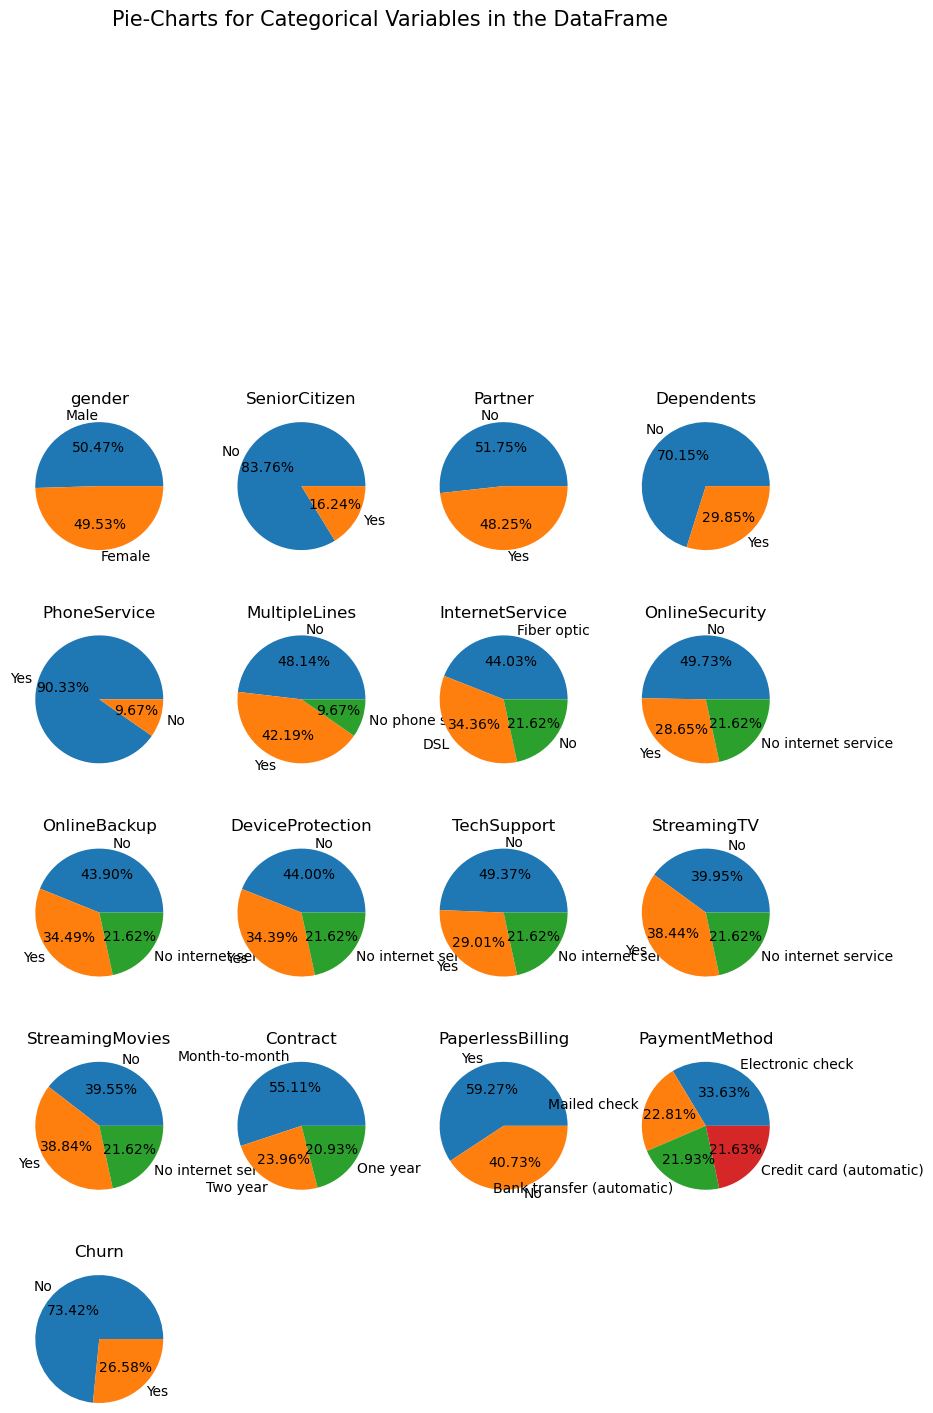

In [27]:
# Creating a function that will accept a DataFrame as input and return pie-charts for all categorical variables
categorical_features = df.select_dtypes(['category']).columns.to_list()

# Number of rows and columns for the subplot grid
nrows = len(categorical_features)
ncols = 4

# Creating the subplot
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (10, 45))
plt.subplots_adjust(wspace = 0.2, hspace = 3)
plt.suptitle("Pie-Charts for Categorical Variables in the DataFrame", fontsize = 15)

# Looping through the list of categorical_features
for i, cat_feature in enumerate(categorical_features):
    num_unique = df[cat_feature].nunique(dropna=True)
    num_missing = df[cat_feature].isna().sum()
    
    print('Pie Chart for: ', cat_feature)
    print('Number of Unique Values: ', num_unique)
    print('Number of Missing Values: ', num_missing)
    
    # Calculating the row and column index for the subplot
    row_idx = i // ncols
    col_idx = i % ncols

    # Plotting the pie chart on the corresponding subplot
    axes[row_idx, col_idx].pie(df[cat_feature].value_counts(dropna=True),
                               labels=df[cat_feature].value_counts(dropna=True).index,
                               autopct='%1.2f%%', radius = 3)
    axes[row_idx, col_idx].set_title(cat_feature, pad = 40)
    
 # Removing empty subplots
for i in range(len(categorical_features), nrows * ncols):
    fig.delaxes(axes.flatten()[i])
plt.show()

Observations:

There are no missing values in any of the categorical features. 

There is almost an equal percentage of male and female customers which implies that gender is not a distinguishing factor for customer base.

Only 16.24% of customers are senior citizens which implies that maximum customers are in the younger generation.

There is almost an equal percentage of customers having partners which implies that having/not having a partner does not affect customer base.

There are approximately 70% customers who do not have dependents on them which implies that they probably have more free time on hand to use the online services and hence they are a customer. 

Approximately 10% customers do not use the phone service.

Approximtely 55% customers have a month to month contract which implies that they do not wish to be committed to this service for long durations.

Approximately 60% customers prefer paperless billing which implies that they are environmentally aware.

In [28]:
# Creating a copy of the dataset for label encoding
cols = df.select_dtypes(include = 'category').columns
# Creating a copy of the dataset
label_encoded_train = df.copy()
# Creating an instance of LabelEncoder
le = LabelEncoder()
for i in cols:
    label_encoded_train[i] = le.fit_transform(label_encoded_train[i])

In [29]:
data = label_encoded_train.copy()
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [30]:
# Splitting the data 
X = data.drop('Churn',axis = 1)
y = data['Churn']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [32]:
# Min - Max Normalization for numeric variables
min_max_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Scaling numerical variables using min max scaler
for column in min_max_columns:
        # minimum value of the column
        min_column = data[column].min()
        # maximum value of the column
        max_column = data[column].max()
        # min max scaler
        data[column] = (data[column] - min_column) / (max_column - min_column) 

3. Model building and performance improvement

In [33]:
# Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels = [1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix( y_actual, y_predict, labels = [0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot = labels, fmt = '')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [34]:
# Function to calculate Accuracy, Recall and Precision of the model 
def get_metrics_score(model,flag = True):
    '''
    model : classifier to predict values of X

    '''
    # Empty list to store train and test results
    score_list = []
    
    # Predicting on training and test set
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    # Accuracy of the model
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    
    # Recall of the model
    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)
    
    # Precision of the model
    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train, y_train))
        print("Accuracy on test set : ",model.score(X_test, y_test))
        print("Recall on training set : ",metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test, pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train, pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test, pred_test))
    
    return score_list

In [35]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Building a decision tree classifier
decision_tree = DecisionTreeClassifier(max_depth = 7, random_state = 150, criterion = 'gini')
decision_tree.fit(X_train, y_train)
decision_tree_score = get_metrics_score(decision_tree)

Accuracy on training set :  0.816
Accuracy on test set :  0.7882018479033405
Recall on training set :  0.5129740518962076
Recall on test set :  0.45081967213114754
Precision on training set :  0.7178770949720671
Precision on test set :  0.6297709923664122


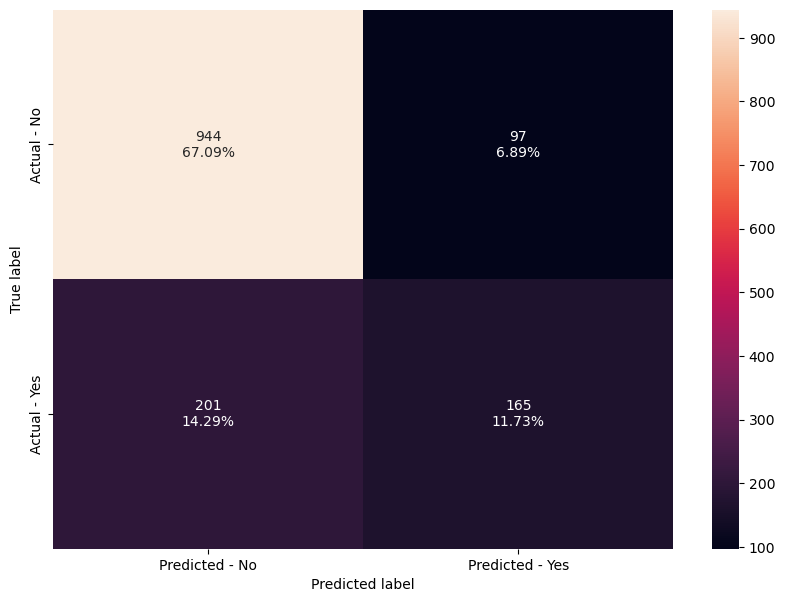

In [36]:
make_confusion_matrix(decision_tree, y_test)

In [37]:
print(pd.DataFrame(decision_tree.feature_importances_, columns = ["Imp"], index = X_train.columns))

                       Imp
gender            0.007996
SeniorCitizen     0.009257
Partner           0.000602
Dependents        0.000649
tenure            0.110776
PhoneService      0.000000
MultipleLines     0.007973
InternetService   0.047064
OnlineSecurity    0.106295
OnlineBackup      0.001034
DeviceProtection  0.000076
TechSupport       0.002505
StreamingTV       0.000000
StreamingMovies   0.014122
Contract          0.440849
PaperlessBilling  0.006205
PaymentMethod     0.004009
MonthlyCharges    0.135283
TotalCharges      0.105306


In [38]:
# Decision tree tuning
decision_tree_tuned = DecisionTreeClassifier(random_state = 150, criterion = 'gini')
# Grid of parameters to choose from
parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
             }
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)
# Running the grid search
grid_dt = GridSearchCV(decision_tree_tuned, parameters, scoring = acc_scorer, cv = 5)
grid_dt = grid_dt.fit(X_train, y_train)
# Best combination of parameters
decision_tree_tuned = grid_dt.best_estimator_
# Fitting the best model
decision_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=150)

In [39]:
decision_tree_tuned_score = get_metrics_score(decision_tree_tuned)

Accuracy on training set :  0.7397333333333334
Accuracy on test set :  0.7512437810945274
Recall on training set :  0.7145708582834331
Recall on test set :  0.7349726775956285
Precision on training set :  0.5092460881934566
Precision on test set :  0.5153256704980843


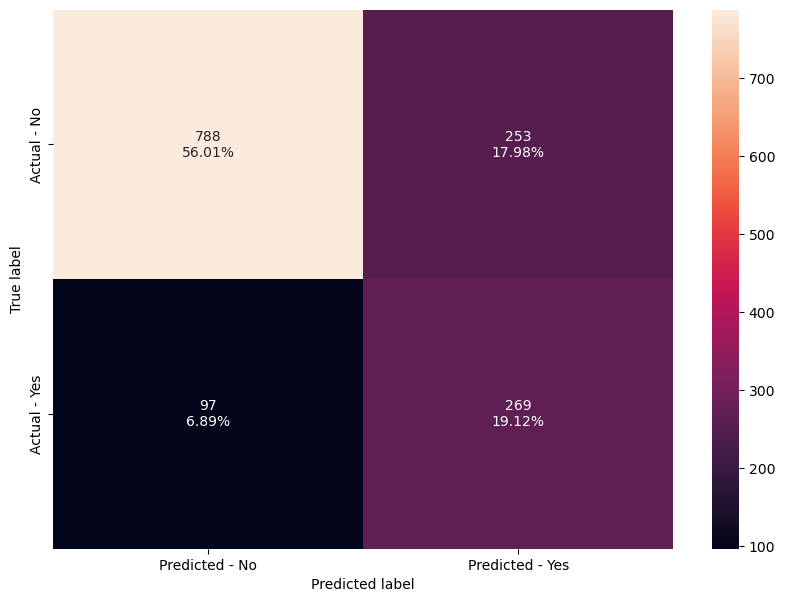

In [40]:
make_confusion_matrix(decision_tree_tuned, y_test)

In [41]:
print(pd.DataFrame(decision_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns))

                       Imp
gender            0.000000
SeniorCitizen     0.000000
Partner           0.000000
Dependents        0.000000
tenure            0.000000
PhoneService      0.000000
MultipleLines     0.000000
InternetService   0.000000
OnlineSecurity    0.191632
OnlineBackup      0.000000
DeviceProtection  0.000000
TechSupport       0.000000
StreamingTV       0.000000
StreamingMovies   0.000000
Contract          0.779245
PaperlessBilling  0.000000
PaymentMethod     0.000000
MonthlyCharges    0.029123
TotalCharges      0.000000


Even though accuracy and precision reduced for both training and test data, precision increased for the tuned model.

Type I Error for base model - 6.89%
Type II Error for base model - 14.29%
Type I Error for tuned model - 17.98%
Type II Error for tuned model - 6.89%

The importance of all features except 'OnlineSecurity', 'Contract' and 'MonthlyCharges' is zero in the tuned model.

In [42]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Building a random forest classifier
random_forest = RandomForestClassifier(n_estimators = 150, random_state = 60, max_features = 10)
random_forest = random_forest.fit(X_train, y_train)
random_forest_score = get_metrics_score(random_forest)

Accuracy on training set :  0.9976888888888888
Accuracy on test set :  0.7995735607675906
Recall on training set :  0.9933466400532269
Recall on test set :  0.505464480874317
Precision on training set :  0.9979946524064172
Precision on test set :  0.6468531468531469


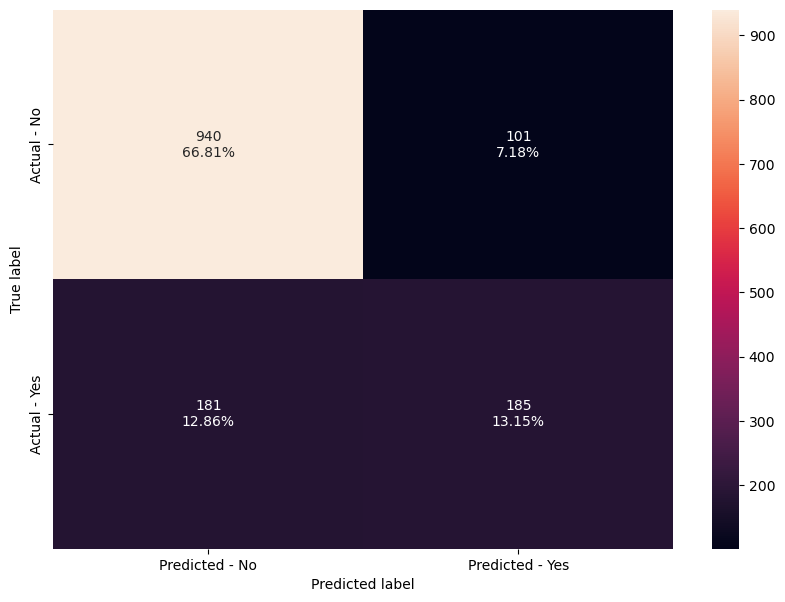

In [43]:
make_confusion_matrix(random_forest, y_test)

In [44]:
print(pd.DataFrame(random_forest.feature_importances_, columns = ["Imp"], index = X_train.columns))

                       Imp
gender            0.025823
SeniorCitizen     0.020314
Partner           0.020567
Dependents        0.018096
tenure            0.136820
PhoneService      0.003949
MultipleLines     0.018626
InternetService   0.016985
OnlineSecurity    0.048650
OnlineBackup      0.019157
DeviceProtection  0.016312
TechSupport       0.035913
StreamingTV       0.012957
StreamingMovies   0.014710
Contract          0.118397
PaperlessBilling  0.024044
PaymentMethod     0.046251
MonthlyCharges    0.205836
TotalCharges      0.196594


In [45]:
# Random Forest tuning
random_forest_tuned = RandomForestClassifier(random_state = 60)
# Grid of parameters to choose from
parameters = {"n_estimators": [200, 300, 400],
             "min_samples_leaf": np.arange(5, 10),
             "max_features": np.arange(0.2, 0.4, 0.5),
             "max_samples": np.arange(0.1, 0.2, 0.4),
             }
# Running the grid search
grid_rf = GridSearchCV(random_forest_tuned, parameters, scoring = 'roc_auc', cv = 5)
grid_rf = grid_rf.fit(X_train, y_train)
# Best combination of parameters
random_forest_tuned = grid_rf.best_estimator_
# Fitting the best model
random_forest_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.2, max_samples=0.1, min_samples_leaf=5,
                       n_estimators=400, random_state=60)

In [46]:
random_forest_tuned_score = get_metrics_score(random_forest_tuned)

Accuracy on training set :  0.8119111111111111
Accuracy on test set :  0.7995735607675906
Recall on training set :  0.49700598802395207
Recall on test set :  0.44808743169398907
Precision on training set :  0.7121067683508103
Precision on test set :  0.6721311475409836


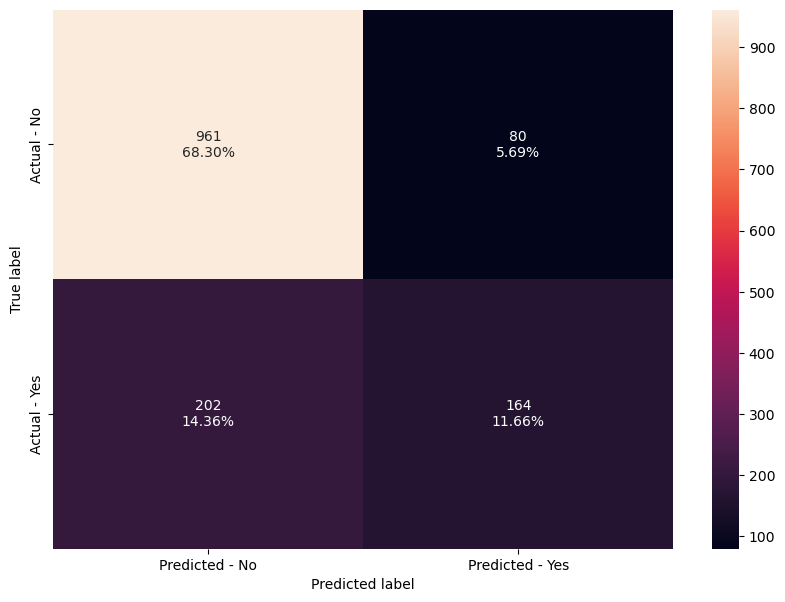

In [47]:
make_confusion_matrix(random_forest_tuned, y_test)

In [48]:
print(pd.DataFrame(random_forest_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns))

                       Imp
gender            0.016340
SeniorCitizen     0.016751
Partner           0.015636
Dependents        0.014298
tenure            0.166923
PhoneService      0.003822
MultipleLines     0.019245
InternetService   0.047731
OnlineSecurity    0.072127
OnlineBackup      0.031799
DeviceProtection  0.029761
TechSupport       0.072037
StreamingTV       0.018224
StreamingMovies   0.018986
Contract          0.127110
PaperlessBilling  0.023517
PaymentMethod     0.045978
MonthlyCharges    0.118664
TotalCharges      0.141052


Accuracy of training data reduced in the tuned model but stayed the same for test data. Recall reduced for training and test data in the tuned model. Precision reduced for training data but increased for test data in the tuned model.

Type I Error for base model - 7.18%
Type II Error for base model - 12.86%
Type I Error for tuned model - 5.69%
Type II Error for tuned model - 14.36%

Importance is given to all features in the model before and after tuning.

In [49]:
# AdaBoosting
from sklearn.ensemble import AdaBoostClassifier
# Building an AdaBoosting classifier
ada_boosting = AdaBoostClassifier(n_estimators = 200, random_state = 10)
ada_boosting = ada_boosting.fit(X_train, y_train)
ada_boosting_score = get_metrics_score(ada_boosting)

Accuracy on training set :  0.8165333333333333
Accuracy on test set :  0.7981520966595593
Recall on training set :  0.5622089155023287
Recall on test set :  0.5163934426229508
Precision on training set :  0.6931911402789172
Precision on test set :  0.6385135135135135


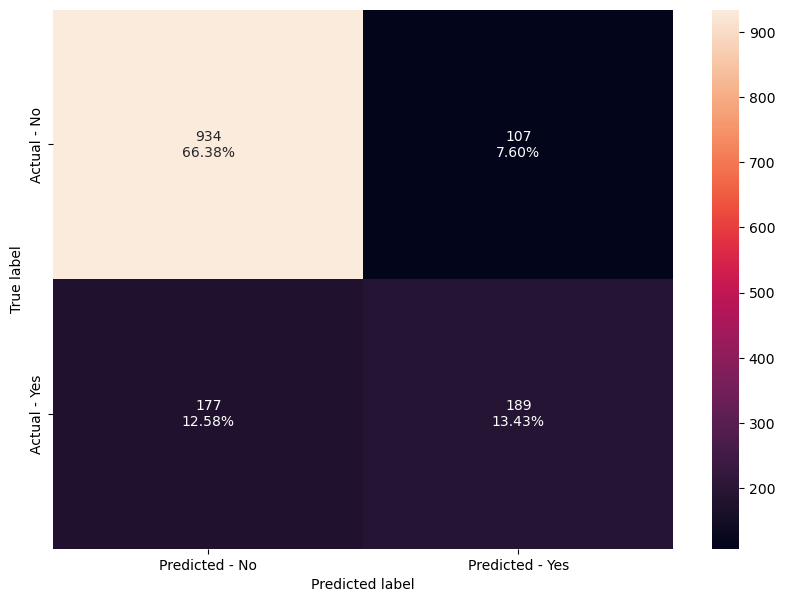

In [50]:
make_confusion_matrix(ada_boosting, y_test)

In [51]:
print(pd.DataFrame(ada_boosting.feature_importances_, columns = ["Imp"], index = X_train.columns))

                    Imp
gender            0.000
SeniorCitizen     0.005
Partner           0.000
Dependents        0.000
tenure            0.150
PhoneService      0.005
MultipleLines     0.005
InternetService   0.005
OnlineSecurity    0.010
OnlineBackup      0.005
DeviceProtection  0.005
TechSupport       0.010
StreamingTV       0.000
StreamingMovies   0.005
Contract          0.040
PaperlessBilling  0.005
PaymentMethod     0.015
MonthlyCharges    0.280
TotalCharges      0.455


In [52]:
# AdaBoosting tuning
ada_boosting_tuned = AdaBoostClassifier(random_state = 10)
# Grid of parameters to choose from
parameters = {"n_estimators": [100, 300, 500, 700, 900],
             "learning_rate": [10, 1, 0.1, 0.01]
             }
# Running the grid search
grid_ab = GridSearchCV(ada_boosting_tuned, parameters, scoring = 'roc_auc', cv = 5)
grid_ab = grid_ab.fit(X_train, y_train)
# Best combination of parameters
ada_boosting_tuned = grid_ab.best_estimator_
# Fitting the best model
ada_boosting_tuned.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=300, random_state=10)

In [53]:
ada_boosting_tuned_score = get_metrics_score(ada_boosting_tuned)

Accuracy on training set :  0.8099555555555555
Accuracy on test set :  0.8052594171997157
Recall on training set :  0.550232867598137
Recall on test set :  0.5081967213114754
Precision on training set :  0.6778688524590164
Precision on test set :  0.6642857142857143


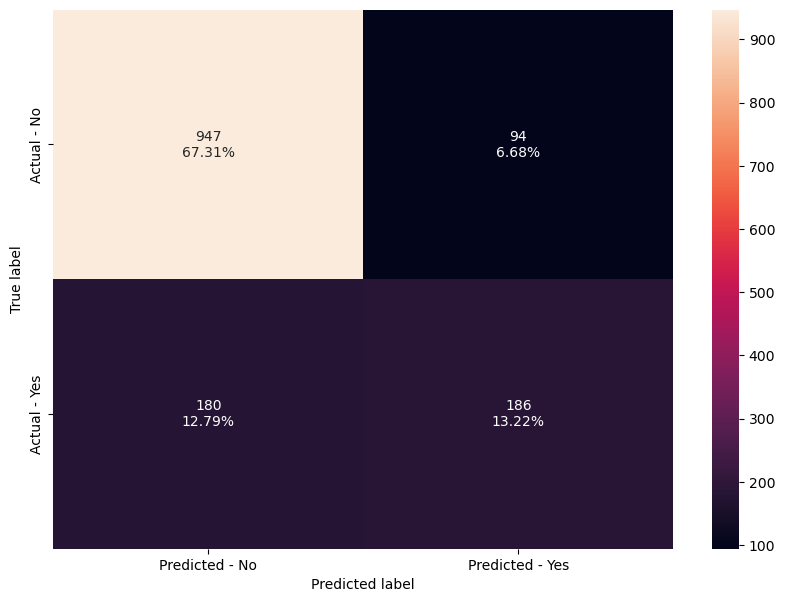

In [54]:
make_confusion_matrix(ada_boosting_tuned, y_test)

In [55]:
print(pd.DataFrame(ada_boosting_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns))

                       Imp
gender            0.000000
SeniorCitizen     0.030000
Partner           0.000000
Dependents        0.000000
tenure            0.193333
PhoneService      0.030000
MultipleLines     0.033333
InternetService   0.020000
OnlineSecurity    0.013333
OnlineBackup      0.016667
DeviceProtection  0.000000
TechSupport       0.010000
StreamingTV       0.006667
StreamingMovies   0.016667
Contract          0.040000
PaperlessBilling  0.023333
PaymentMethod     0.090000
MonthlyCharges    0.220000
TotalCharges      0.256667


Accuracy for training data reduced while that of test data increased in the tuned model. Recall reduced for both training and test data in the tuned model. Precision for training data reduced while that of test data increased in the tuned model.

Type I Error for base model - 7.60%
Type II Error for base model - 12.58%
Type I Error for tuned model - 6.68%
Type II Error for tuned model - 12.79%

No importance was given to DeviceProtection while StreamingTV was given importance in the tuned model. TechSupport and Contract were given the same importance in the tuned model. MonthlyCharges and TotalCharges were given lesser importance in the tuned model while all remaining features were given more importance.

In [56]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# Building a GradientBoosting classifier
gradient_boosting = GradientBoostingClassifier(n_estimators = 100, random_state = 20)
gradient_boosting = gradient_boosting.fit(X_train, y_train)
gradient_boosting_score = get_metrics_score(gradient_boosting)

Accuracy on training set :  0.8300444444444445
Accuracy on test set :  0.7967306325515281
Recall on training set :  0.5755156353958749
Recall on test set :  0.48633879781420764
Precision on training set :  0.7311918850380389
Precision on test set :  0.644927536231884


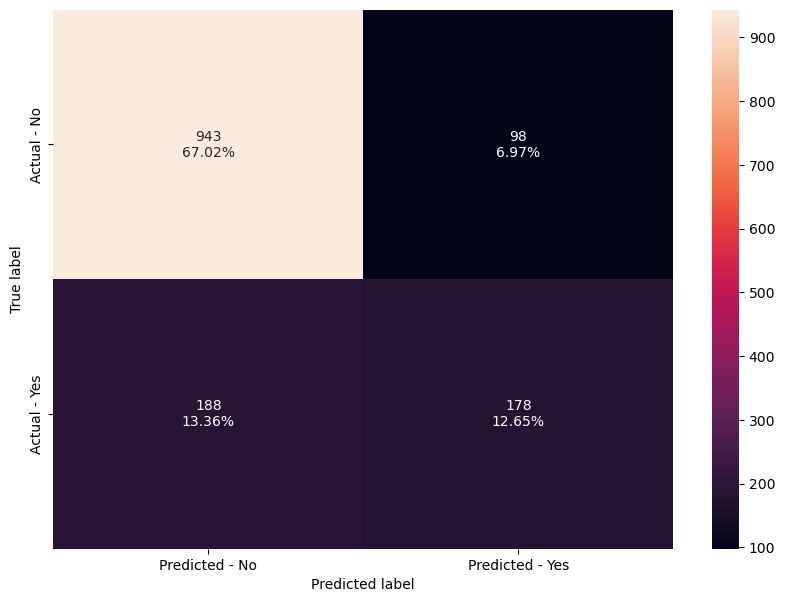

In [57]:
make_confusion_matrix(gradient_boosting, y_test)

In [58]:
print(pd.DataFrame(gradient_boosting.feature_importances_, columns = ["Imp"], index = X_train.columns))

                       Imp
gender            0.001954
SeniorCitizen     0.009753
Partner           0.000404
Dependents        0.002463
tenure            0.146239
PhoneService      0.001972
MultipleLines     0.006620
InternetService   0.008726
OnlineSecurity    0.068869
OnlineBackup      0.007550
DeviceProtection  0.001668
TechSupport       0.052499
StreamingTV       0.001539
StreamingMovies   0.007992
Contract          0.403900
PaperlessBilling  0.014820
PaymentMethod     0.018670
MonthlyCharges    0.153986
TotalCharges      0.090375


In [59]:
# Gradient Boosting tuning
gradient_boosting_tuned = GradientBoostingClassifier(random_state = 20)
# Grid of parameters to choose from
parameters = {'n_estimators': [10, 50, 100, 500],
             'min_samples_split': [2, 3, 4]
             }
# Running the grid search
grid_gb = GridSearchCV(gradient_boosting_tuned, parameters, scoring = 'roc_auc', cv = 5)
grid_gb = grid_gb.fit(X_train, y_train)
# Best combination of parameters
gradient_boosting_tuned = grid_gb.best_estimator_
# Fitting the best model
gradient_boosting_tuned.fit(X_train, y_train)

GradientBoostingClassifier(min_samples_split=3, n_estimators=50,
                           random_state=20)

In [60]:
gradient_boosting_tuned_score = get_metrics_score(gradient_boosting_tuned)

Accuracy on training set :  0.8204444444444444
Accuracy on test set :  0.8024164889836531
Recall on training set :  0.5442448436460412
Recall on test set :  0.4808743169398907
Precision on training set :  0.715660542432196
Precision on test set :  0.6666666666666666


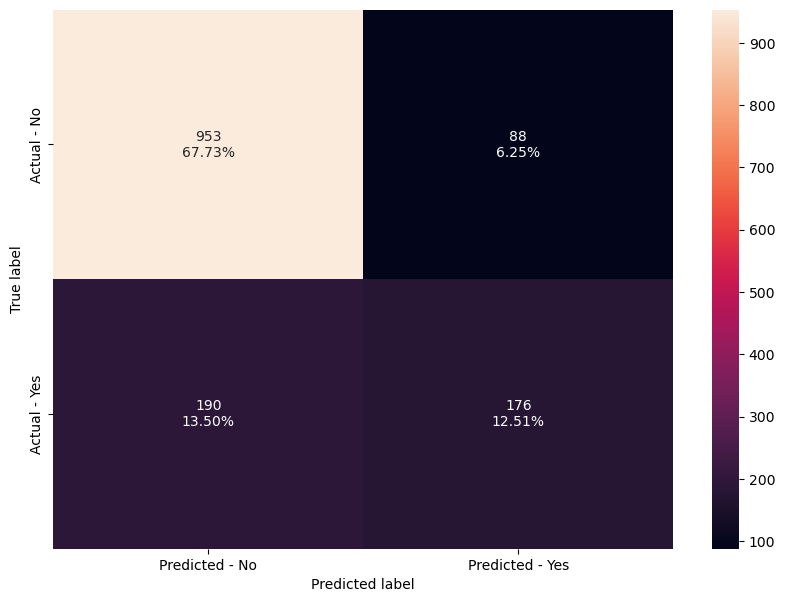

In [61]:
make_confusion_matrix(gradient_boosting_tuned, y_test)

In [62]:
print(pd.DataFrame(gradient_boosting_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns))

                       Imp
gender            0.000177
SeniorCitizen     0.009006
Partner           0.000000
Dependents        0.000656
tenure            0.153672
PhoneService      0.001590
MultipleLines     0.006512
InternetService   0.008240
OnlineSecurity    0.073205
OnlineBackup      0.007824
DeviceProtection  0.001148
TechSupport       0.056218
StreamingTV       0.000870
StreamingMovies   0.007814
Contract          0.435793
PaperlessBilling  0.014811
PaymentMethod     0.018574
MonthlyCharges    0.137530
TotalCharges      0.066360


Accuracy for training data reduced while that of test data increased in the tuned model. Recall reduced for both training and test data in the tuned model. Precision for training data reduced while that of test data increased in the tuned model.

Type I Error for base model - 6.97%
Type II Error for base model - 13.36%
Type I Error for tuned model - 6.25%
Type II Error for tuned model - 13.50%

No importance was given to Partner in the tuned model. Dependents, PhoneService, MultipleLines, InternetService, DeviceProtection, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, MonthlyCharges and TotalCharges were given lesser importance in the tuned model while all remaining features were given more importance.

In [63]:
# Comparing all models
models = [decision_tree, decision_tree_tuned, random_forest, random_forest_tuned, ada_boosting, ada_boosting_tuned,
         gradient_boosting, gradient_boosting_tuned]

# Defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [64]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree with default parameters','Tuned Decision Tree',
                                          'Random Forest with deafult parameters','Tuned Random Forest',
                                          'AdaBoosting with deafult parameters', 'Tuned Adaboosting',
                                          'Gradient Bootsing with deafult parameters', 'Tuned Gradient Boosting'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree with default parameters,0.82,0.79,0.51,0.45,0.72,0.63
1,Tuned Decision Tree,0.74,0.75,0.71,0.73,0.51,0.52
2,Random Forest with deafult parameters,1.00,0.80,0.99,0.51,1.00,0.65
3,Tuned Random Forest,0.81,0.80,0.50,0.45,0.71,0.67
4,AdaBoosting with deafult parameters,0.82,0.80,0.56,0.52,0.69,0.64
5,Tuned Adaboosting,0.81,0.81,0.55,0.51,0.68,0.66
6,Gradient Bootsing with deafult parameters,0.83,0.80,0.58,0.49,0.73,0.64
7,Tuned Gradient Boosting,0.82,0.80,0.54,0.48,0.72,0.67


Tuned Adaboosting model performed the best. Test Accuracy for Tuned AdaBoosting was the highest (0.81). The Type I Error for the tuned model reduced while the Type II Error for the tuned model increased marginally. This model also has the best balance between train and test accuracy, recall and precision as compared to other models. It is also relatively consistent across training and test data which implies that it is less likely to be overfit. Therefore, the performance of the Tuned AdaBoosting model was the best as compared to the other models.